<a href="https://colab.research.google.com/github/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/blob/master/NNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time
from tabulate import tabulate

In [2]:
# function to compute hypothesis
def hypothesis(X ,weight):
  hyp = []
  for i in range(len(X)):
      hyp.append(weight[0] + weight[1] * X[i,1] + weight[2] * X[i,2])
  return np.array(hyp)

def sum(X , Y ,weight):
  sum = np.zeros((3,1))
  hyp = hypothesis(X , weight)
  for i in range(len(X)):
    sum[0] = sum[0] + (hyp[i] - Y[i])
    sum[1] = sum[1] + (hyp[i] - Y[i])*X[i,1]
    sum[2] = sum[2] + (hyp[i] - Y[i])*X[i,2]
  return np.array(sum)

# function to compute the cost for current values of weight
def cost(X, y, weight): 
    h = hypothesis(X, weight) 
    J = 0.5*np.sum((h-y)**2)
    return J

# function to compute Mean Squared Error
def mse(Y_pred , Y):
  mse = np.sum((Y_pred - Y)**2)/len(Y)
  return mse

# function to compute cost in ridge regression
def cost_ridge(X, y, weight ,lmbda=0.25):
  h = hypothesis(X, weight)
  J = 0.5*(np.sum((h-y)**2) + lmbda*np.sum(weight**2))
  return J

# function to compute cost in least angle regression
def cost_LAR(X, y, weight ,lmbda=0.25):
  h = hypothesis(X, weight)
  J = 0.5*(np.sum((h-y)**2)) + lmbda*np.sum(np.absolute(weight))
  return J

**1. Implement the linear regression algorithm to estimate the weight parameters. You can use batch gradient descent algorithm for the implementation. (a) Plot the cost function vs the number of iterations. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph (w= [w0 w1 w2]). (c) Evaluate the mean square error between the actual test output and predicted test output. Please use the files such as Training feature matrix, training output vector, test feature matrix, test output vector for this question (Use for or while loop for the implementation of linear regression).**

The final cost function value after applying linear regression using batch gradient descent = 113.31751838021925


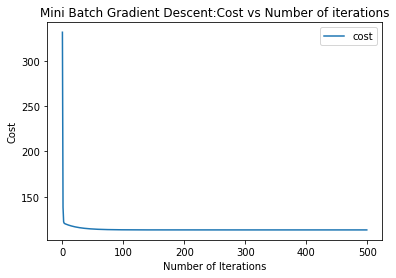

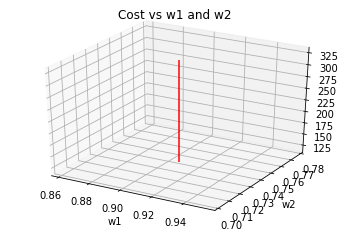


MSE = 40.22803691086154


In [4]:
X_train = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/training_feature_matrix.csv" ,header = None))
Y_train = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/training_output.csv")).reshape(-1,1)

X_test = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/test_feature_matrix.csv"  ,header = None))
Y_test = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/test_output.csv" ,header = None)).reshape(-1,1)

# Normalisation

X_train_normalised = ((X_train) - np.mean(X_train))/np.std(X_train)
Y_train_normalised = ((Y_train)  - np.mean(Y_train))/np.std(Y_train)

X_test_normalised = ((X_test) - np.mean(X_train))/np.std(X_train)
Y_test_normalised = ((X_test)  - np.mean(Y_train))/np.std(Y_train)

# Adding a column vector of ones to training and testing feature matrix

X_train_normalised  = np.c_[ np.ones(len(X_train_normalised)), X_train_normalised]
X_test_normalised =  np.c_[ np.ones(len(X_test_normalised)), X_test_normalised]

# function to perform batch gradient descent 
def batch_gradient_descent(X, Y, learning_rate = 0.001, iterations = 500):

  weight = np.random.random((X.shape[1],1)) 

  cost_list = []
  w0 = []
  w1 = []
  w2 = [] 
  
  for i in range(iterations):
    w0.append(weight[0])
    w1.append(weight[1])
    w2.append(weight[2])
    cost_list.append(cost(X, Y, weight)) 

    sum_temp = sum(X,Y,weight)

    weight[0] = weight[0] - learning_rate * sum_temp[0]
    weight[1] = weight[1] - learning_rate * sum_temp[1]
    weight[2] = weight[2] - learning_rate * sum_temp[2]
  
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)


# calling batch gradient descent function
weight , cost_list , w0 , w1 , w2 = batch_gradient_descent(X_train_normalised , Y_train_normalised)
LR_bgd = weight

# Final Cost after linear regression using batch gradient descent
print("The final cost function value after applying linear regression using batch gradient descent = " +str(cost(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(cost_list , label = "cost")
plt.title("Mini Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_LR_bgd = mse(Y_pred , Y_test)
print ("\nMSE = " + str(mse_LR_bgd))

**2. Implement mini-batch and stochastic gradient descent algorithms for the linear
regression problem in question number 1. (a) Plot the cost function vs the number of
iterations. (b) Plot the cost function vs w1 and w2. (c) Evaluate the mean square error
between the actual test output and predicted test output. Please use the same data files as
in question number 1 (Use for or while loop for the implementation)**

The final cost function value after applying linear regression using mini batch gradient descent = 113.53402716658334


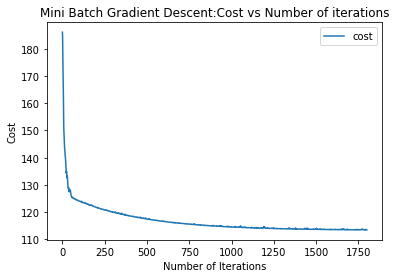

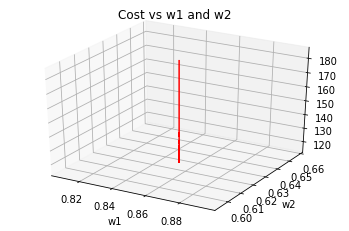


MSE = 40.939805097487614


In [5]:
# function to create a list containing mini-batches 
def create_mini_batches(X, Y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, Y)) 
    np.random.shuffle(data) 
    n_minibatches = int(data.shape[0] / batch_size) 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

# function to perform mini-batch gradient descent 
def mini_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=3 , batch_size = 32):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    mini_batches = create_mini_batches(X, Y, batch_size)

    for mini_batch in mini_batches:
      X_mini, Y_mini = mini_batch
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost(X, Y, weight)) 

      sum_temp = sum(X_mini,Y_mini,weight)

      weight[0] = weight[0] - learning_rate * sum_temp[0]
      weight[1] = weight[1] - learning_rate * sum_temp[1]
      weight[2] = weight[2] - learning_rate * sum_temp[2] 
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling mini batch gradient descent function
weight , cost_list , w0 , w1 , w2 = mini_batch_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=100 , batch_size= 15)
LR_mbgd = weight

# Final Cost after linear regression using mini batch gradient descent
print("The final cost function value after applying linear regression using mini batch gradient descent = " +str(cost(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Mini Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_LR_mbgd = mse(Y_pred , Y_test)

print ("\nMSE = " + str(mse_LR_mbgd))

The final cost function value after applying linear regression using Stochastic gradient descent = 113.32005556310204


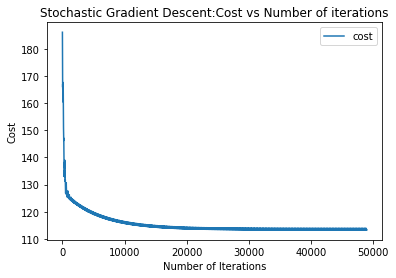

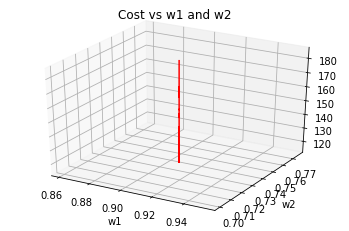


MSE = 40.02908768954276


In [6]:
# function to perform stochastic gradient descent

def stochastic_gradient_descent(X, Y, learning_rate = 0.001 , iteration=500):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    for j in range(len(X)):
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost(X, Y, weight))

      hyp = hypothesis(X,weight)

      weight[0] = weight[0] - learning_rate * (hyp[j] - Y[j])
      weight[1] = weight[1] - learning_rate * (hyp[j] - Y[j])*X[j,1]
      weight[2] = weight[2] - learning_rate * (hyp[j] - Y[j])*X[j,2]
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling stochastic gradient descent function
weight , cost_list , w0 , w1 , w2 = stochastic_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=200) 
LR_sgd = weight

# Final Cost after linear regression using mini batch gradient descent
print("The final cost function value after applying linear regression using Stochastic gradient descent = " +str(cost(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Stochastic Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_LR_sgd = mse(Y_pred , Y_test)
print ("\nMSE = " + str(mse_LR_sgd))

**3. Implement the ridge regression problem by considering batch, mini-batch and stochastic
gradient descent algorithms. (a) Plot the cost function vs the number of iterations for all
three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for
all three cases. (c) Evaluate the mean square error between the actual test output and
predicted test output. Please use the same data files as in question number 1 (Use for or
while loop for the implementation).**

In [7]:
# function to perform ridge regression for batch gradient descent

def ridge_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=500 , lmbda=0.25):

  np.random.seed(15)
  weight = np.random.random((X.shape[1],1)) 

  cost_list = []
  w0 = []
  w1 = []
  w2 = [] 
  
  for i in range(iteration):
    w0.append(weight[0])
    w1.append(weight[1])
    w2.append(weight[2])
    cost_list.append(cost_ridge(X, Y, weight , lmbda))

    sum_temp = sum(X,Y,weight)

    weight[0] = (1-learning_rate*lmbda)*weight[0] - learning_rate * sum_temp[0]
    weight[1] = (1-learning_rate*lmbda)*weight[1] - learning_rate * sum_temp[1]
    weight[2] = (1-learning_rate*lmbda)*weight[2] - learning_rate * sum_temp[2] 

  
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling ridge batch gradient descent function
weight , cost_list , w0 , w1 , w2 = ridge_batch_gradient_descent(X_train_normalised , Y_train_normalised)
ridge_bgd = weight 

# Final Cost after ridge regression using batch gradient descent
print("The final cost function value after applying ridge regression using batch gradient descent = " +str(cost_ridge(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iteration
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Ridge Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_ridge_bgd = mse(Y_pred , Y_test)

print ("\nMSE = " + str(mse_ridge_bgd))

SyntaxError: ignored

The final cost function value after applying ridge regression using mini batch gradient descent = 114.02514514691433


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


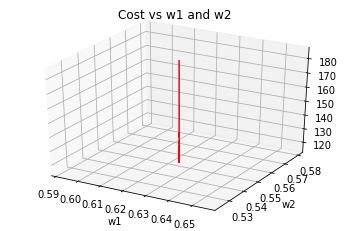

MSE = 42.125954842270225


In [7]:
# function to perform ridge regression for mini batch gradient descent

def ridge_mini_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=3 , batch_size = 32 ,lmbda=0.25):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    mini_batches = create_mini_batches(X, Y, batch_size)

    for mini_batch in mini_batches:
      X_mini, Y_mini = mini_batch
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost_ridge(X, Y, weight , lmbda))

      sum_temp = sum(X_mini,Y_mini,weight)

      weight[0] = (1-learning_rate*lmbda)*weight[0] - learning_rate * sum_temp[0]
      weight[1] = (1-learning_rate*lmbda)*weight[1] - learning_rate * sum_temp[1]
      weight[2] = (1-learning_rate*lmbda)*weight[2] - learning_rate * sum_temp[2]  
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling ridge mini batch gradient descent function
weight , cost_list , w0 , w1 , w2 = ridge_mini_batch_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=100 , batch_size= 15)
ridge_mbgd = weight

# Final Cost after ridge regression using mini batch gradient descent
print("The final cost function value after applying ridge regression using mini batch gradient descent = " +str(cost_ridge(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Ridge Mini Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_ridge_mbgd = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_ridge_mbgd))

The final cost function value after applying ridge regression using Stochastic gradient descent = 119.53892557717975
MSE = 48.32238265537296


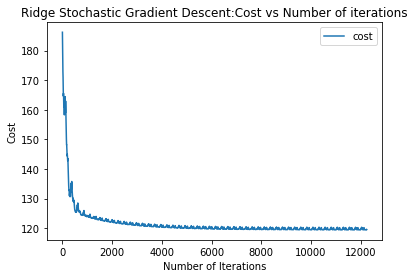

In [42]:
# function to perform ridge regression for stochastic gradient descent

def ridge_stochastic_gradient_descent(X, Y, learning_rate = 0.001 , iteration=50 ,lmbda=0.25):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    for j in range(len(X)):
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost_ridge(X, Y, weight,lmbda))

      hyp = hypothesis(X,weight)

      weight[0] = (1-learning_rate*lmbda)*weight[0] - learning_rate * (hyp[j] - Y[j])
      weight[1] = (1-learning_rate*lmbda)*weight[1] - learning_rate * (hyp[j] - Y[j])*X[j,1]
      weight[2] = (1-learning_rate*lmbda)*weight[2] - learning_rate * (hyp[j] - Y[j])*X[j,2] 
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling ridge stochastic batch gradient descent function
weight , cost_list , w0 , w1 , w2 = ridge_stochastic_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=50 ,lmbda =0.4 )
ridge_sgd = weight

# Final Cost after ridge regression using stochastic gradient descent
print("The final cost function value after applying ridge regression using Stochastic gradient descent = " +str(cost_ridge(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("Ridge Stochastic Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_ridge_sgd = str(mse(Y_pred , Y_test)
print ("MSE = " + str(mse_ridge_sgd))

**4. Implement Least angle regression to estimate the weight parameters for the feature
matrix (X) and the class label vector (y) by considering batch, mini-batch and stochastic
gradient descent-based algorithms. (a) Plot the cost function vs the number of iterations for
all three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for
all three cases. (c) Evaluate the mean square error between the actual test output and
predicted test output. Please use the same data files as in question number 1 (Use for or
while loop for the implementation).**

The final cost function value after applying LAR using batch gradient descent = 113.72248487857246
MSE = 40.36405013471351


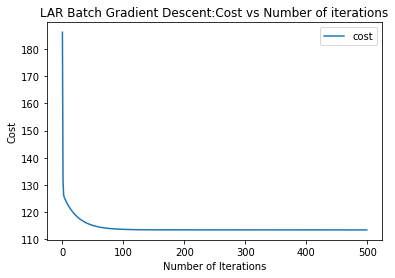

In [43]:
# function to perform LAR for batch gradient descent

def LAR_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=500 , lmbda=0.25):

  np.random.seed(15)
  weight = np.random.random((X.shape[1],1)) 

  cost_list = []
  w0 = []
  w1 = []
  w2 = [] 
  
  for i in range(iteration):
    w0.append(weight[0])
    w1.append(weight[1])
    w2.append(weight[2])
    cost_list.append(cost_ridge(X, Y, weight , lmbda))

    sum_temp = sum(X,Y,weight)

    weight[0] = (weight[0]-learning_rate*lmbda*np.sign(weight[0])) - learning_rate * sum_temp[0]
    weight[1] = (weight[1]-learning_rate*lmbda*np.sign(weight[1])) - learning_rate * sum_temp[1]
    weight[2] = (weight[2]-learning_rate*lmbda*np.sign(weight[2])) - learning_rate * sum_temp[2] 

  
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)
# calling LAR batch gradient descent function
weight , cost_list , w0 , w1 , w2 = LAR_batch_gradient_descent(X_train_normalised , Y_train_normalised)
lar_bgd = weight

# Final Cost after linear regression using LAR batch gradient descent
print("The final cost function value after applying LAR using batch gradient descent = " +str(cost_LAR(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iteration
plt.plot(np.array(cost_list) , label = "cost")
plt.title("LAR Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_lar_bgd = mse(Y_pred , Y_test)
print ("MSE = " + str(mse(Y_pred , Y_test)))

The final cost function value after applying LAR using mini batch gradient descent = 114.91964108112032
MSE = 43.87186977959823


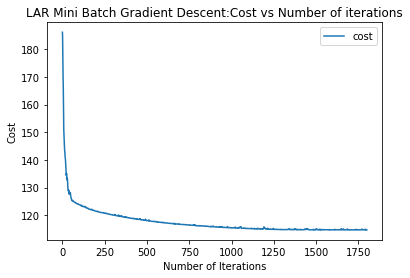

In [44]:
# function to perform LAR for mini batch gradient descent

def LAR_mini_batch_gradient_descent(X, Y, learning_rate = 0.001 , iteration=3 , batch_size = 32 ,lmbda=0.25):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    mini_batches = create_mini_batches(X, Y, batch_size)

    for mini_batch in mini_batches:
      X_mini, Y_mini = mini_batch
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost_ridge(X, Y, weight , lmbda))

      sum_temp = sum(X_mini,Y_mini,weight)

      weight[0] = (weight[0]-learning_rate*lmbda*np.sign(weight[0])) - learning_rate * sum_temp[0]
      weight[1] = (weight[1]-learning_rate*lmbda*np.sign(weight[1])) - learning_rate * sum_temp[1]
      weight[2] = (weight[2]-learning_rate*lmbda*np.sign(weight[2])) - learning_rate * sum_temp[2] 
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling LAR mini batch gradient descent function
weight , cost_list , w0 , w1 , w2 = LAR_mini_batch_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=100 , batch_size= 15)
lar_mbgd = weight

# Final Cost after linear regression using LAR mini batch gradient descent
print("The final cost function value after applying LAR using mini batch gradient descent = " +str(cost_LAR(X_train_normalised , Y_train_normalised , weight)))

# (a) Plotting Cost vs Number of iteration
plt.plot(np.array(cost_list) , label = "cost")
plt.title("LAR Mini Batch Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_lar_mbgd = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_lar_mbgd))

The final cost function value after applying LAR using Stochastic gradient descent = 122.7077803422182
MSE = 49.00295706548366


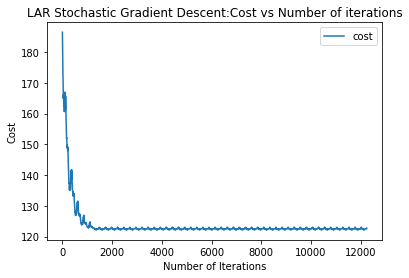

In [45]:
# function to perform LAR for stochastic gradient descent

def LAR_stochastic_gradient_descent(X, Y, learning_rate = 0.001 , iteration=50 ,lmbda=0.25):
  np.random.seed(15)
  weight = np.random.random((X.shape[1], 1)) 
  cost_list = [] 

  w0 = []
  w1 = []
  w2 = [] 

  for i in range(iteration):
    for j in range(len(X)):
      w0.append(weight[0])
      w1.append(weight[1])
      w2.append(weight[2])
      cost_list.append(cost_LAR(X, Y, weight,lmbda))

      hyp = hypothesis(X,weight)

      weight[0] = (weight[0]-learning_rate*lmbda*np.sign(weight[0])) - learning_rate * (hyp[j] - Y[j])
      weight[1] = (weight[1]-learning_rate*lmbda*np.sign(weight[1])) - learning_rate * (hyp[j] - Y[j])*X[j,1]
      weight[2] = (weight[2]-learning_rate*lmbda*np.sign(weight[2])) - learning_rate * (hyp[j] - Y[j])*X[j,2] 
              
  return weight , np.array(cost_list).reshape(-1,1) , np.array(w0) , np.array(w1) , np.array(w2)

# calling LAR stochastic batch gradient descent function
weight , cost_list , w0 , w1 , w2 = LAR_stochastic_gradient_descent(X_train_normalised , Y_train_normalised ,iteration=50 ,lmbda =0.4 )
lar_sgd = weight

# Final Cost after LAR using stochastic gradient descent
print("The final cost function value after applying LAR using Stochastic gradient descent = " +str(cost_LAR(X_train_normalised , Y_train_normalised , weight ,lmbda=0.25)))

# (a) Plotting Cost vs Number of iterations
plt.plot(np.array(cost_list) , label = "cost")
plt.title("LAR Stochastic Gradient Descent:Cost vs Number of iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.legend()

# (b) Plotting Cost vs W1 vs W2
ax = plt.axes(projection ='3d')
ax.plot_wireframe(w1 , w2 ,cost_list , color='red')
plt.ylabel('w2')
plt.xlabel('w1')
plt.title('Cost vs w1 and w2')
plt.show()

# (c) Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_lar_sgd = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_lar_sgd))

**5. Implement the vectorized linear regression, ridge regression and least angle regression
problems to evaluate the weight parameters for question number 1. Compare the weight
parameters of vectorization-based methods with the weights obtained using batch, minibatch and stochastic gradient descent-based algorithms. Please use the same data files as 
in question number 1. Evaluate the mean square error between the actual test output and
predicted test output.**

In [46]:
# Vectorisation based Linear Regression

def Vector_linear_regression(X,Y):
  weight = np.dot(np.dot(np. linalg. inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
  return weight

weight = Vector_linear_regression(X_train_normalised, Y_train_normalised)
LR_vec = weight

#Mean squared error

Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_lr_vect = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_lr_vect))

print(weight)

MSE = 40.175608794378846
[[0.28476922]
 [1.02910301]
 [0.73492105]]


In [47]:
# Vectorisation based Ridge Regression

def Vector_ridge_regression(X,Y,lmbda=0.25):
  weight = np.dot(np.dot(np. linalg. inv(np.dot(np.transpose(X),X) + lmbda*np.eye(X.shape[1])) , np.transpose(X)),Y)
  return weight

weight = Vector_ridge_regression(X_train_normalised, Y_train_normalised)
ridge_vec = weight
#Mean squared error
Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_ridge_vect = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_ridge_vect))

print(weight)

MSE = 40.45029535316194
[[-0.06981754]
 [ 0.6677349 ]
 [ 0.73993378]]


In [48]:
# Vectorisation based Least Angle Regression

def Vector_LAR(X,Y,lmbda=0.25):
  weight = np.random.random((X.shape[1],1))
  weight = np.dot(np. linalg. inv(np.dot(np.transpose(X),X)) ,(np.dot(np.transpose(X),Y)-0.5*lmbda*np.sign(weight)))
  return weight

weight = Vector_LAR(X_train_normalised, Y_train_normalised)
lar_vec = weight

#Mean squared error
Y_pred_normalised = hypothesis(X_test_normalised , weight)
Y_pred = Y_pred_normalised*np.std(Y_train) + np.mean(Y_train)
mse_lar_vect = mse(Y_pred , Y_test)
print ("MSE = " + str(mse_lar_vect))

print(weight)

MSE = 40.52374731276184
[[-0.33415379]
 [ 0.4100708 ]
 [ 0.75474262]]


In [49]:
# Comparision Table

x0 = np.ones(x1.shape)
X_train = np.column_stack((x0, x1, x2))
X0 = np.ones(X1.shape)
X_test = np.column_stack((X0,X1,X2))
w = np.random.randn(1, 3)
print("LINEAR REGRESSION ")
print(" ")
w_v_bgd = batch_gradient_descent_vi(X_train, y, w)
mse_v_bgd = pred_v(w_v_bgd, X_test, Y)
bgd_table = [["W0",w_v_bgd[0],w0_bgd,w0_mbgd,w0_sgd],["W1",w_v_bgd[1],w1_bgd,w1_mbgd,w1_sgd],["W2",w_v_bgd[2],w2_bgd,w2_mbgd,w2_sgd],["MSE",mse_v_bgd,mse_bgd,mse_mbgd,mse_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","BGD-Vectorized","BGD","MBGD","SGD"],tablefmt="pretty"))
print("")
print(" ")
print(" ")
print("RIDGE REGRESSION")
print(" ")
w_r_v_bgd = ridge_batch_gradient_descent_vi(X_train, y, w)
mse_r_v_bgd = pred_v(w_r_v_bgd, X_test, Y)
bgd_table = [["W0",w_r_v_bgd[0],w0_r_bgd,w0_r_mbgd,w0_r_sgd],["W1",w_r_v_bgd[1],w1_r_bgd,w1_r_mbgd,w1_r_sgd],["W2",w_r_v_bgd[2],w2_r_bgd,w2_r_mbgd,w2_r_sgd],["MSE",mse_r_v_bgd,mse_r_bgd,mse_r_mbgd,mse_r_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","Ridge-Vectorized","Ridge-BGD","Ridge-MBGD", "Ridge-SGD"],tablefmt="pretty"))
print(" ")
print(" ")
print("LEAST ANGLE REGRESSION")
print(" ")
w_lar_v_bgd = least_angle_batch_gradient_descent_vi(X_train, y, w)
mse_lar_v_bgd = pred_v(w_lar_v_bgd, X_test, Y)
bgd_table = [["W0",w_lar_v_bgd[0],w0_lar_bgd,w0_lar_mbgd,w0_lar_sgd],["W1",w_lar_v_bgd[1],w1_lar_bgd,w1_lar_mbgd,w1_lar_sgd],["W2",w_lar_v_bgd[2],w2_lar_bgd,w2_lar_mbgd,w2_lar_sgd],["MSE",mse_lar_v_bgd,mse_lar_bgd,mse_lar_mbgd,mse_lar_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","Least Angle - Vectorization","Least Angle - BGD","Least Angle - MBGD","Least Angle - SGD"],tablefmt="pretty"))
#print(cost)
#print(" ")
#plot2d("cost", "iterations", cost, "Batch-Gradient-Descent")
#print(" ")
#plot3d_v(cost, w_list, "cost", "w1", "w2", "Batch-Gradient-Descent")
#print(" ")

**6. Implement K-means clustering based unsupervised learning algorithm for the dataset
(“data2.xlsx”). Plot the estimated class labels vs features. Use the number of clusters as
K=3.**

[[5.21666667 3.64       1.47333333 0.28      ]
 [4.74166667 2.95416667 1.75416667 0.32916667]
 [6.31458333 2.89583333 4.97395833 1.703125  ]]


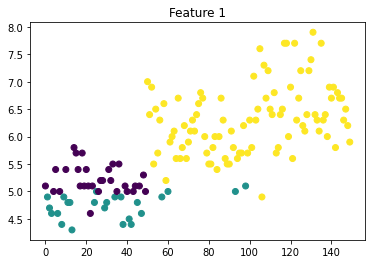

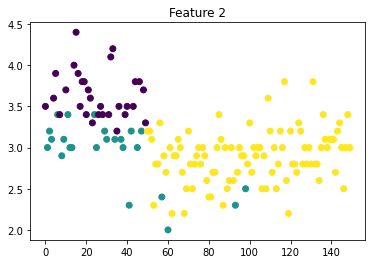

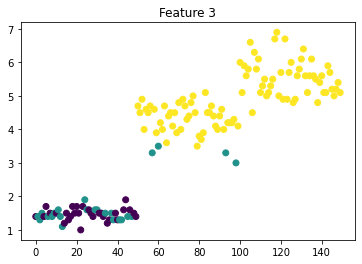

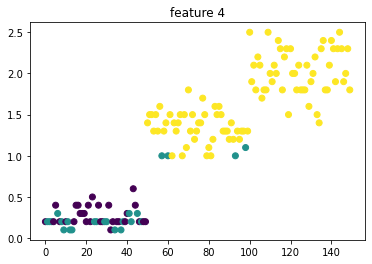

In [50]:
data2 = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/data2.csv" , header= None))

#Method to find the euclidean distance between centroid and points 
def distance(item, centroid):
    return np.sqrt(np.sum((item-centroid)**2))

# Function to determine cluster based on Euclidean Distance
def cluster(item , centroids , k=3):
  dist = []
  for i in range(k):
    dist.append(distance(item,centroids[i]))
  return np.argmin(np.array(dist))

# Function for k means clustering

def K_Means_Cluster(X, k=3 , iteration = 1000):
  random_indices = np.random.choice(len(X), 3)
  centroids = X[random_indices]
  clusters = np.zeros(len(X))

  for itr in range(iteration):
    for i in range(len(X)):
      clusters[i] = cluster(X[i], centroids)
    for i in range(k):
      pts = [X[j] for j in range(len(X)) if clusters[j] == i]
      centroids[i] = np.mean(pts, axis = 0)

  return centroids, clusters

#Calling the function of K_Means_CLuster

centroids, clusters =  K_Means_Cluster(data2 , iteration= 3000)
print(centroids)

#Plotting the graphs seaprately for the respective features 
plt.figure()
plt.scatter(np.arange(len(data2)), data2[:, 0],c = clusters.flatten())
plt.title('Feature 1')
plt.show()
plt.figure()
plt.scatter(np.arange(len(data2)), data2[:, 1],c = clusters.flatten())
plt.title('Feature 2')
plt.show()
plt.figure()
plt.scatter(np.arange(len(data2)), data2[:, 2],c = clusters.flatten())
plt.title('Feature 3')
plt.show()
plt.figure()
plt.scatter(np.arange(len(data2)), data2[:, 3],c = clusters.flatten())
plt.title('feature 4')
plt.show()

**7. Implement the logistic regression algorithm for the binary classification using the
dataset (“data3.xlsx”). Divide the dataset into training and testing using hold-out crossvalidation technique with 60 % of instances as training and the remaining 40% as testing.
Evaluate the accuracy, sensitivity and specificity values for the binary classifier.**

In [51]:
def sigmoid(x, theta):
    z= np.dot(x, theta)
    return 1/(1+np.exp(-z))

def hypothesis(theta, x):
    return sigmoid(x, theta)

def cost_function(theta, x, y):
    m = x.shape[0]
    h = hypothesis(theta, x)
    return -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))

def gradient(theta, x, y):
    m = x.shape[0]
    h = hypothesis(theta, x)
    return (1/m) * np.dot(x.T, (h-y))

In [53]:
data3 = np.array(pd.read_csv("https://raw.githubusercontent.com/Pnsahu94/Neural-Nets-and-Fuzzy-Logic-Assgnment-1/master/data3.csv" , header= None))
data3 = np.concatenate((np.ones(shape = (data3.shape[0],1)),data3) ,axis = 1)
data3 = pd.DataFrame(data3)
data3.columns = ['x0', 'x1', 'x2', 'x3', 'x4', 'y']

#Normalization
data3.iloc[ :,1:-1] = (data3.iloc[ :,1:-1] - data3.iloc[ :,1:-1].mean()) / data3.iloc[ :,1:-1].std()

#True Classes
data3.iloc[ :,-1] = data3.iloc[ :,-1] - 1

data_train = data3.sample(frac=0.6 , random_state= 1)
data_test = data3.drop(data_train.index)

X_train = np.array(data_train.iloc[:,:-1])
Y_train = np.array(data_train.iloc[:,-1]).reshape((-1, 1)) 

X_test = np.array(data_test.iloc[:,:-1])
Y_test = np.array(data_test.iloc[:,-1]).reshape((-1, 1)) 

def binary_classifier( X , Y , iteration = 500 , learning_rate = 0.2):
  theta = np.random.random((X.shape[1],1))

  for i in range(iteration):
    theta = theta - learning_rate*gradient(theta , X ,Y)
    
  return np.array(theta)

theta = binary_classifier(X_train , Y_train)
theta

# Evaluating Test Set
hyp = hypothesis(theta , X_test)

#True positives , False positives , true negatives , False negatives
tp, fp, tn, fn = 0, 0, 0, 0
for i in range(len(Y_test)):
  if (hyp[i] > 0.5):
    label = 1
  else :
    label = 0
    
  if(label == Y_test[i]):
    if(label == 0):
       tn += 1
    else:
      tp += 1
  else:
    if(label == 0):
      fn += 1
    else:
      fp += 1

print("True positivie: ",tp)
print("True negative: ",tn)
print("False positivie: ",fp)
print("False negative: ",fn)
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp )

print( "\nAccuracy     = " , accuracy)
print("Sensitivity  = " , sensitivity)
print("Specificity  = ",specificity)

True positivie:  18
True negative:  22
False positivie:  0
False negative:  0

Accuracy     =  1.0
Sensitivity  =  1.0
Specificity  =  1.0


**8. Implement the multiclass logistic regression algorithm using both “One VS All” and
“One VS One” multiclass coding techniques. Evaluate the performance of the multiclass
classifier using individual class accuracy and overall accuracy measures. Use the hold-out
cross-validation approach (60% training and 40% testing) for the selection of training and
test instances. (Please use the dataset “data4.xlsx”)**